In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [142]:
# matplotlib.rcParams.update({'font.size': 25})

In [143]:

file_name = r"../playground/log_nes13.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [144]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

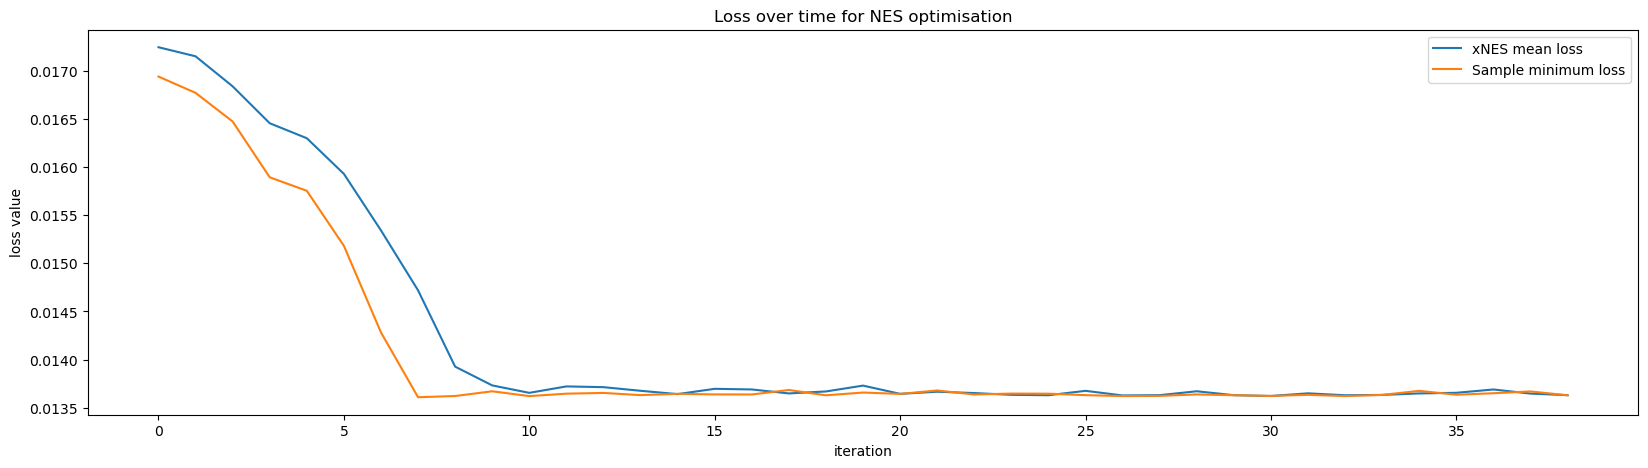

In [153]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
# plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
# plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

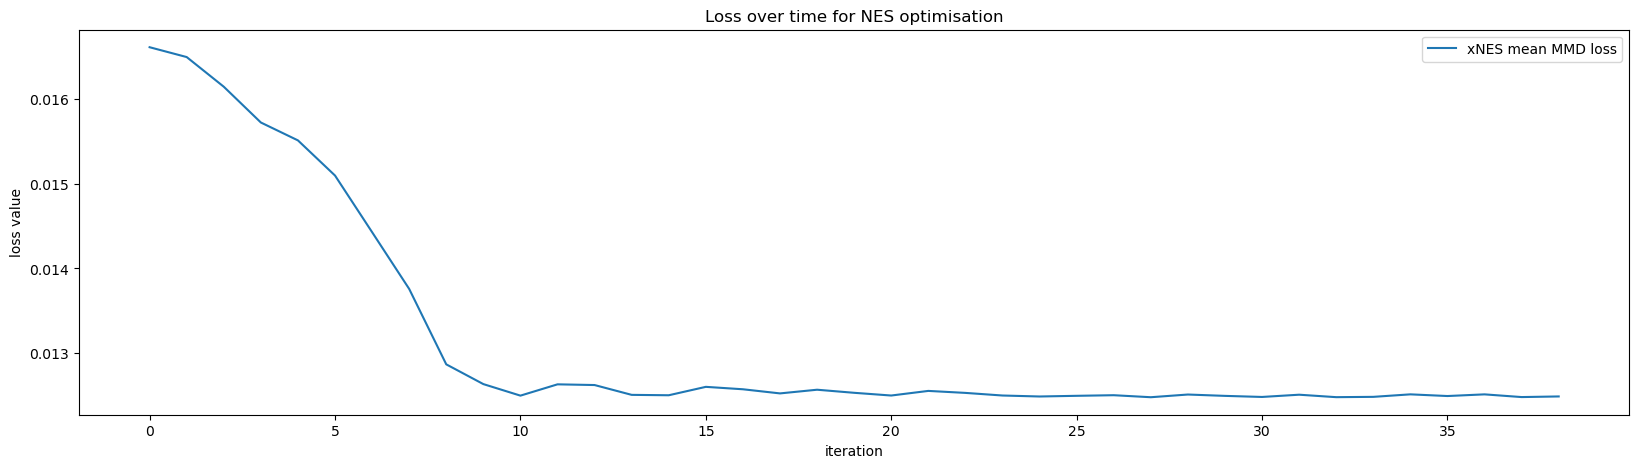

In [146]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

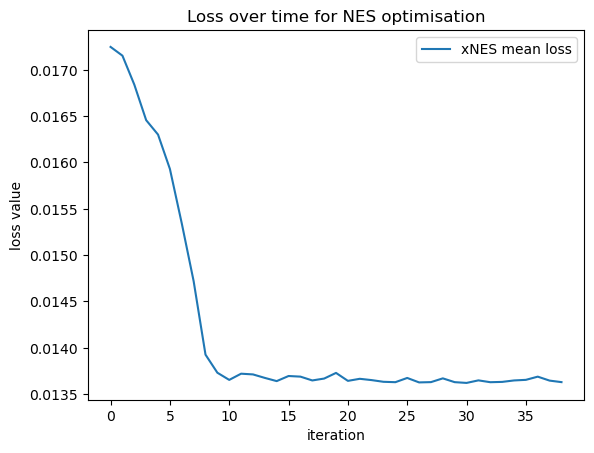

In [147]:
plt.plot(loss_df["mean"], label="xNES mean loss")
# plt.plot(loss_df["avg"], label="Sample average loss")
# plt.plot(loss_df["min"], label="Sample minimum loss")
# plt.plot(loss_df["max"], label="Sample maximum loss")
# plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [148]:
def plot_standing_average(array, show=True):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average)
    if show:
        plt.show()

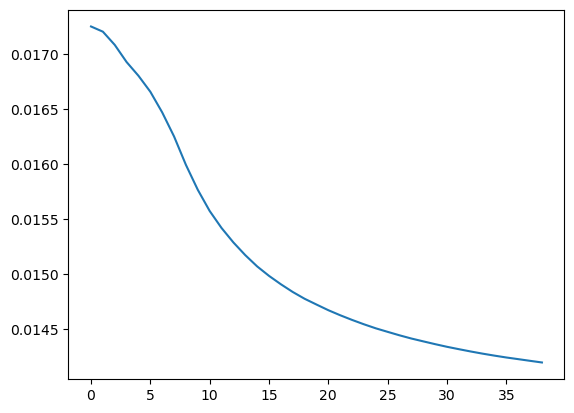

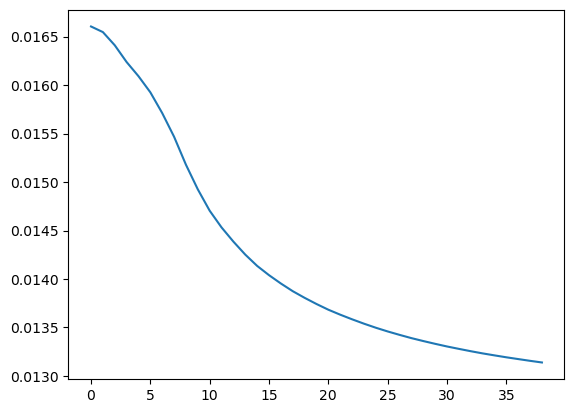

In [149]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["avg"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["min"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["max"].to_numpy().squeeze(), show=False)
plt.show()

plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [150]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.014198388689412473
std: 0.0011080435610966665
max: 0.0172470770776271
min: 0.0136212725192308
range: 0.0036258045583962995


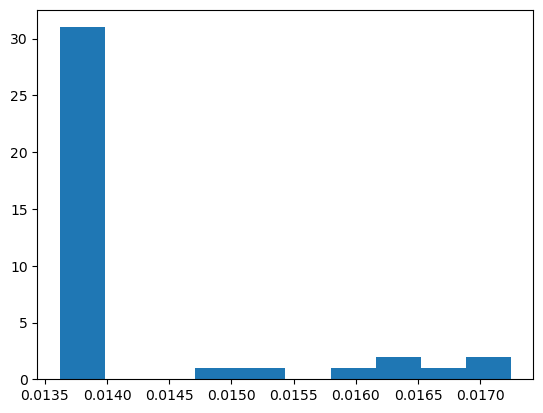

mean: 0.06274284193148978
std: 0.2489520345249068
max: 1.5608841180801392
min: 0.0137132173404097
range: 1.5471709007397294


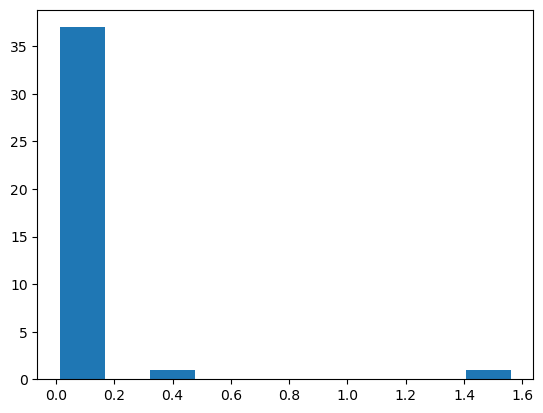

mean: 0.014045967195087466
std: 0.000943007584914297
max: 0.0169418714940547
min: 0.0136084845289587
range: 0.0033333869650960003


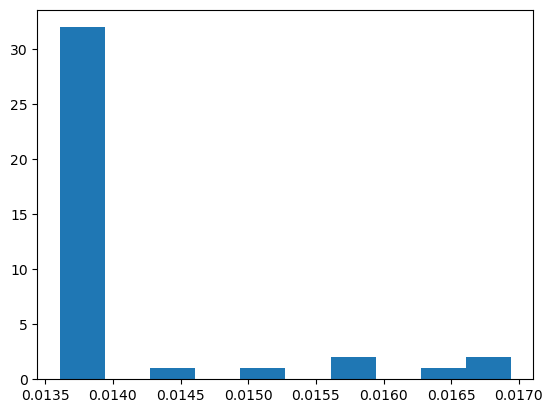

mean: 0.5951748577734598
std: 2.983023459652622
max: 18.545509338378903
min: 0.0139541057869791
range: 18.531555232591923


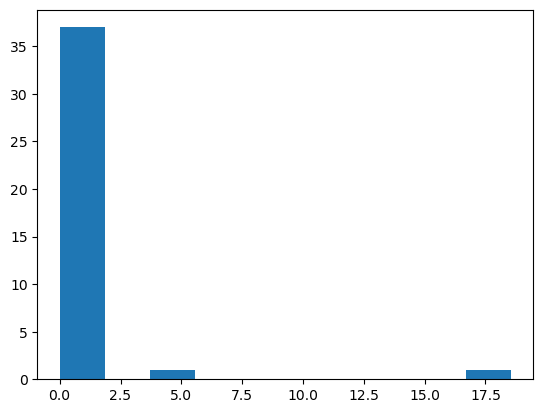

mean: 0.013138938026550437
std: 0.0012582281578254785
max: 0.0166049376130104
min: 0.0124832019209861
range: 0.0041217356920243


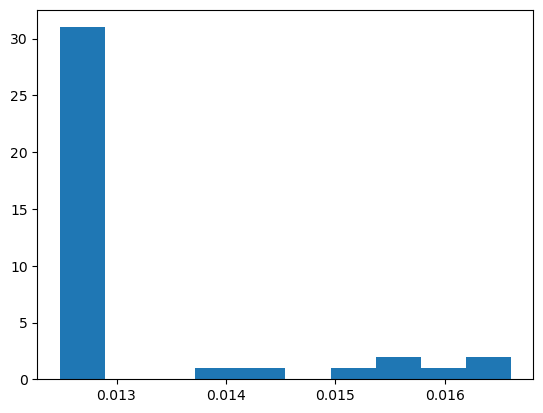

In [151]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg"].to_numpy().squeeze())
print_loss_analysis(loss_df["min"].to_numpy().squeeze())
print_loss_analysis(loss_df["max"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

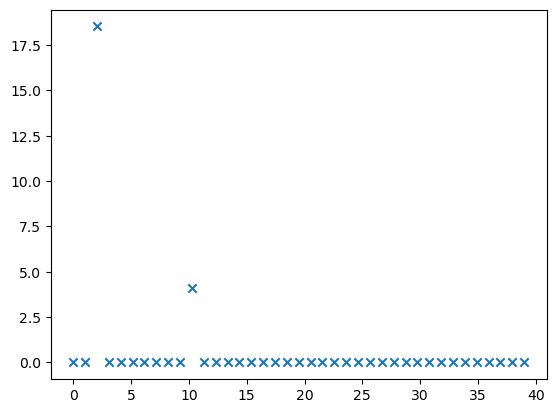

mean: 0.5811288905783722
std: 2.982651492355646
max: 18.529034672304984
min: 0.0003172503784297995
range: 18.528717421926554


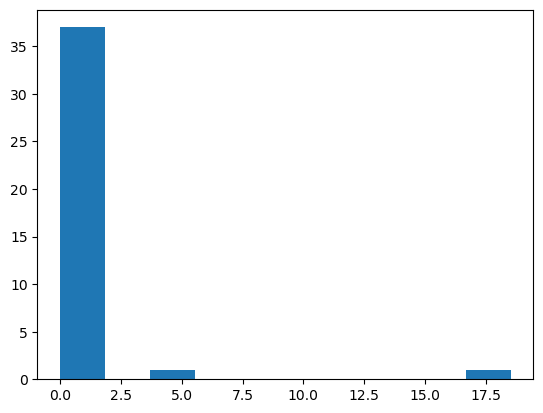

In [152]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())